# Modelado Estocástico
## Clase 5 - Introducción a Regresión Múltiple

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.stats.api as sms

In [2]:
dfcasa = pd.read_excel('Ejemplo_Casa.xls', sheet_name='HPRICE', usecols='A:L')
dfcasa.head()

,PRECIO,LOTE,CUARTOS,BANOS,PISOS,ENTRADA,REC,SOTANO,CALEF,AIRE,GARAGE,NBHD
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


### Genero mis datos `y` y `X`, separando los PRECIOS de los valores restantes (y sumando la columna de constantes con unos)

In [3]:
y = dfcasa['PRECIO']
X = dfcasa.drop(columns='PRECIO')
X = sm.add_constant(X)
X.head()

,const,LOTE,CUARTOS,BANOS,PISOS,ENTRADA,REC,SOTANO,CALEF,AIRE,GARAGE,NBHD
0,1.0,5850,3,1,2,1,0,1,0,0,1,0
1,1.0,4000,2,1,1,1,0,0,0,0,0,0
2,1.0,3060,3,1,1,1,0,0,0,0,0,0
3,1.0,6650,3,1,2,1,1,0,0,0,0,0
4,1.0,6360,2,1,1,1,0,0,0,0,0,0


### Corremos la regresión múltiple y observamos los valores resultantes:

In [4]:
regmul = sm.OLS(y, X).fit()
regmul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PRECIO   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     99.97
Date:                Wed, 20 Aug 2025   Prob (F-statistic):          6.18e-122
Time:                        20:58:25   Log-Likelihood:                -6034.1
No. Observations:                 546   AIC:                         1.209e+04
Df Residuals:                     534   BIC:                         1.214e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4038.3504   3409.471     -1.184      0.237   -1.07e+04    2659.271
LOTE           3.5463      0.350     10.124      0.000       2.858       4.234
CUARTOS     1832.0035   1047.000      1.750      0.081    -224.741    3888.748
BANOS       1.434e+04   1489.921      9.622      0.000    1.14e+04    1.73e+04
PISOS       6556.9457    925.290      7.086      0.000    4739.291    8374.600
ENTRADA     6687.7789   2045.246      3.270      0.001    2670.065    1.07e+04
REC         4511.2838   1899.958      2.374      0.018     778.976    8243.592
SOTANO      5452.3855   1588.024      3.433      0.001    2332.845    8571.926
CALEF       1.283e+04   3217.597      3.988      0.000    6510.706    1.92e+04
AIRE        1.263e+04   1555.021      8.124      0.000    9578.182    1.57e+04
GARAGE      4244.8290    840.544      5.050      0.000    2593.650    5896.008
NBHD        9369.5132   1669.091      5.614      0.000    6090.724    1.26e+04
==============================================================================
Omnibus:                       93.454   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.620
Skew:                           0.853   Prob(JB):                     1.70e-54
Kurtosis:                       5.824   Cond. No.                     3.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Realizamos el Test t para $H_0: \beta_{\text{AIRE}} = 10000$

In [5]:
print(regmul.t_test("AIRE = 10000"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          1.263e+04   1555.021      1.693      0.091    9578.182    1.57e+04


### Realizamos el Test F para

$H_0: \text{CALEF} = 0 \text{ y AIRE} = 0$

In [6]:
print(regmul.f_test("CALEF = 0, AIRE = 0"))

<F test: F=36.88875086741611, p=9.856033740435902e-16, df_denom=534, df_num=2>


### Intervalo de confianza del 95% para $\beta_{LOTE}$

In [7]:
print(regmul.conf_int(alpha=0.05).loc["LOTE"])

0    2.858168
1    4.234438
Name: LOTE, dtype: float64


Queremos saber cuáles son las casas con al menos cuatro baños:

In [8]:
dfcasa[dfcasa["BANOS"] >= 4]

,PRECIO,LOTE,CUARTOS,BANOS,PISOS,ENTRADA,REC,SOTANO,CALEF,AIRE,GARAGE,NBHD
331,175000,8960,4,4,4,1,0,0,0,1,3,0


En este caso hay exactamente una, la quitamos de la muestra:

In [9]:
df_filtrado = dfcasa[dfcasa["BANOS"] != 4].copy()
df_filtrado.BANOS.value_counts()

BANOS
1    402
2    133
3     10
Name: count, dtype: int64

Volvemos a correr el modelo, pero sin considerar la fila de la casa de 4 baños al momento de armar `y1` y `X1`

In [10]:
y1 = df_filtrado['PRECIO']
X1 = sm.add_constant(df_filtrado.drop(columns='PRECIO'))
regMenos4 = sm.OLS(y1, X1).fit()
regMenos4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PRECIO   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     96.14
Date:                Wed, 20 Aug 2025   Prob (F-statistic):          7.67e-119
Time:                        20:58:25   Log-Likelihood:                -6022.2
No. Observations:                 545   AIC:                         1.207e+04
Df Residuals:                     533   BIC:                         1.212e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3509.7393   3419.390     -1.026      0.305   -1.02e+04    3207.395
LOTE           3.5341      0.350     10.102      0.000       2.847       4.221
CUARTOS     1909.3244   1046.422      1.825      0.069    -146.293    3964.941
BANOS       1.383e+04   1519.347      9.102      0.000    1.08e+04    1.68e+04
PISOS       6492.6879    924.670      7.022      0.000    4676.244    8309.132
ENTRADA     6722.7877   2042.146      3.292      0.001    2711.146    1.07e+04
REC         4623.2425   1898.206      2.436      0.015     894.360    8352.125
SOTANO      5506.6270   1585.876      3.472      0.001    2391.293    8621.961
CALEF         1.3e+04   3214.103      4.043      0.000    6681.465    1.93e+04
AIRE        1.262e+04   1552.591      8.130      0.000    9572.753    1.57e+04
GARAGE      4139.8173    841.671      4.919      0.000    2486.418    5793.216
NBHD        9469.9610   1667.598      5.679      0.000    6194.090    1.27e+04
==============================================================================
Omnibus:                       97.367   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.699
Skew:                           0.881   Prob(JB):                     5.48e-58
Kurtosis:                       5.917   Cond. No.                     3.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Creamos _dummies_ para exactamente 2 y exactamente 3 baños.

(Al convertir un valor booleano como ¿Tiene exactamente 2 baños? o `df_filtrado['BANOS'] == 2` a un valor de tipo int con `.astype(int)`, vamos a obtener 1 si es verdadero y 0 si no.)

In [11]:
df_filtrado['DB2'] = (df_filtrado['BANOS'] == 2).astype(int)
df_filtrado['DB3'] = (df_filtrado['BANOS'] == 3).astype(int)
df_filtrado.head(8)

,PRECIO,LOTE,CUARTOS,BANOS,PISOS,ENTRADA,REC,SOTANO,CALEF,AIRE,GARAGE,NBHD,DB2,DB3
0,42000,5850,3,1,2,1,0,1,0,0,1,0,0,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0,0,0
5,66000,4160,3,1,1,1,1,1,0,1,0,0,0,0
6,66000,3880,3,2,2,1,0,1,0,0,2,0,1,0
7,69000,4160,3,1,3,1,0,0,0,0,0,0,0,0


- Construyo mi `X` con la columna de unos y sin el acumulado de baños ni el Precio (`y`) para correr nuevamente el modelo con las dummies.

In [12]:
X2 = sm.add_constant(df_filtrado.drop(columns=['PRECIO', 'BANOS']))
regdummy = sm.OLS(y1, X2).fit()
print(regdummy.summary())

                            OLS Regression Results                            
Dep. Variable:                 PRECIO   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     88.01
Date:                Wed, 20 Aug 2025   Prob (F-statistic):          7.04e-118
Time:                        20:58:25   Log-Likelihood:                -6022.1
No. Observations:                 545   AIC:                         1.207e+04
Df Residuals:                     532   BIC:                         1.213e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.031e+04   3464.573      2.976      0.0

Test F para `DB3` $= 2 *$ `DB2`

In [13]:
print(regdummy.f_test("DB3 = 2 * DB2"))

<F test: F=0.18151291728592758, p=0.6702485908495301, df_denom=532, df_num=1>


### Utilizando la sintaxis de `statsmodel.formula.api`:

In [14]:
regsmf = smf.ols('PRECIO ~ LOTE + CUARTOS + C(BANOS) + PISOS + ENTRADA + REC + SOTANO + CALEF + AIRE + GARAGE + NBHD', data=df_filtrado).fit()
print(regsmf.summary())

                            OLS Regression Results                            
Dep. Variable:                 PRECIO   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     88.01
Date:                Wed, 20 Aug 2025   Prob (F-statistic):          7.04e-118
Time:                        20:58:25   Log-Likelihood:                -6022.1
No. Observations:                 545   AIC:                         1.207e+04
Df Residuals:                     532   BIC:                         1.213e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.031e+04   3464.573      2.976

In [15]:
print(regsmf.f_test('C(BANOS)[T.2] = 0'))

print(regsmf.params.index.tolist())

print(regsmf.f_test("C(BANOS)[T.3] = 2 * C(BANOS)[T.2]"))

<F test: F=60.98075593837508, p=3.087247239772811e-14, df_denom=532, df_num=1>
['Intercept', 'C(BANOS)[T.2]', 'C(BANOS)[T.3]', 'LOTE', 'CUARTOS', 'PISOS', 'ENTRADA', 'REC', 'SOTANO', 'CALEF', 'AIRE', 'GARAGE', 'NBHD']
<F test: F=0.18151291728666552, p=0.6702485908488229, df_denom=532, df_num=1>


En `stats.formula.api` los operadores tienen fines específicos:
- `x1:x2` incluye solo la interacción pura entre `x1` y `x2`.

- `x1*x2` incluye `x1`, `x2` y `x1:x2` (interacción)

- `x1 + x2` incluye efectos principales de `x1` y `x2`.

Entonces si hacemos la regresión con `PRECIO ~ LOTE + CUARTOS + LOTE:NBHD`

`PRECIO` será la variable dependiente y `LOTE + CUARTOS` los efectos de esas variables junto a los de `LOTE:NBHD`, que es la interacción pura de `LOTE` y `NBHD`. Veamos sus resultados:

In [16]:
regpura = smf.ols('PRECIO ~ LOTE + CUARTOS + LOTE:NBHD ', data= dfcasa).fit()
print(regpura.summary())
print(regpura.f_test('LOTE:NBHD = 0'))

                            OLS Regression Results                            
Dep. Variable:                 PRECIO   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     123.6
Date:                Wed, 20 Aug 2025   Prob (F-statistic):           5.15e-61
Time:                        20:58:25   Log-Likelihood:                -6197.0
No. Observations:                 546   AIC:                         1.240e+04
Df Residuals:                     542   BIC:                         1.242e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9043.5973   4032.019      2.243      0.0

La fórmula `PRECIO ~  CUARTOS + LOTE*NBHD` incorpora el operador `*` en `LOTE*NBHD`, que significa las variables y las interacciones.

In [17]:
regprod = smf.ols('PRECIO ~  CUARTOS + LOTE*NBHD ', data= dfcasa).fit()
print(regprod.summary())
print(regprod.f_test('NBHD=0 , LOTE:NBHD = 0'))

                            OLS Regression Results                            
Dep. Variable:                 PRECIO   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     93.70
Date:                Wed, 20 Aug 2025   Prob (F-statistic):           1.62e-60
Time:                        20:58:25   Log-Likelihood:                -6195.6
No. Observations:                 546   AIC:                         1.240e+04
Df Residuals:                     541   BIC:                         1.242e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7294.7262   4163.014      1.752      0.0

In [18]:
regprod2 = smf.ols('PRECIO ~  LOTE*CUARTOS*BANOS*NBHD ', data= dfcasa).fit()
print(regprod2.summary())

                            OLS Regression Results                            
Dep. Variable:                 PRECIO   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     43.95
Date:                Wed, 20 Aug 2025   Prob (F-statistic):           7.00e-83
Time:                        20:58:25   Log-Likelihood:                -6118.7
No. Observations:                 546   AIC:                         1.227e+04
Df Residuals:                     530   BIC:                         1.234e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                4

## Análisis general de los valores de otra regresión:

In [19]:
regsums = smf.ols('PRECIO ~ LOTE + CUARTOS + BANOS + PISOS + ENTRADA + REC + SOTANO + CALEF + AIRE + GARAGE + NBHD', data=dfcasa).fit()
print(regsums.summary())

                            OLS Regression Results                            
Dep. Variable:                 PRECIO   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     99.97
Date:                Wed, 20 Aug 2025   Prob (F-statistic):          6.18e-122
Time:                        20:58:25   Log-Likelihood:                -6034.1
No. Observations:                 546   AIC:                         1.209e+04
Df Residuals:                     534   BIC:                         1.214e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4038.3504   3409.471     -1.184      0.2

### Intercepto y pendientes

In [20]:
intercepto = regsums.params['Intercept']
pendiente_LOTE = regsums.params['LOTE']
regsums.params

Intercept    -4038.350425
LOTE             3.546303
CUARTOS       1832.003466
BANOS        14335.558468
PISOS         6556.945711
ENTRADA       6687.778890
REC           4511.283826
SOTANO        5452.385539
CALEF        12831.406266
AIRE         12632.890405
GARAGE        4244.829004
NBHD          9369.513239
dtype: float64

### Descomposición de la suma de cuadrados

$
\text{RSS} = \text{TSS} - \text{ESS}
$

In [21]:
tss = regsums.centered_tss
ess = regsums.ess
rss = regsums.ssr
print(f"TSS: {tss} \nESS: {ess} \nRSS: {rss} \nSuma ESS+RSS = {ess + rss}")

TSS: 388602785841.3553 
ESS: 261577714196.8873 
RSS: 127025071644.46799 
Suma ESS+RSS = 388602785841.3553


### $R^2$

In [22]:
regsums.rsquared

np.float64(0.6731236206414506)

In [23]:
ess/tss

np.float64(0.6731236206414506)

In [24]:
1 - rss / tss

np.float64(0.6731236206414506)

### Estimador $s^2$ del parámetro $\sigma^2$

In [25]:
regsums.scale

np.float64(237874666.00087637)

In [26]:
rss/regsums.df_resid

np.float64(237874666.00087637)

Solemos usar la raiz cuadrada de este estadistico, i.e., el desvio estandar estimado de los errores $\sigma$:

In [27]:
np.sqrt(regsums.scale)

np.float64(15423.185987365787)

Verificamos que los residuos suman (aproximadamente) cero

In [28]:
regsums.resid.sum()

np.float64(1.82189978659153e-08)

In [29]:
print(np.dot(regsums.model.exog[:, 1], regsums.resid))
print(np.dot(regsums.model.exog[:, 2], regsums.resid))
print(np.dot(regsums.model.exog[:, 3], regsums.resid))

0.00015275180339813232
4.9156369641423225e-08
2.2439053282141685e-08


###  Matriz de varianzas y Covarianzas de los beta_sombrero $\hat{\beta}$

In [30]:
var_beta = regsums.cov_params()
regsums.cov_params().iloc[2,11]
regsums.cov_params().loc['CUARTOS','NBHD']

np.float64(-37257.28943368957)

Los valores de la segunda columna los invocamos com `regsums.bse`

In [31]:
regsums.bse

Intercept    3409.471300
LOTE            0.350300
CUARTOS      1047.000220
BANOS        1489.920852
PISOS         925.289906
ENTRADA      2045.245829
REC          1899.957691
SOTANO       1588.023899
CALEF        3217.597061
AIRE         1555.021065
GARAGE        840.544182
NBHD         1669.090660
dtype: float64

In [32]:
regsums.bse['LOTE']

np.float64(0.3502999554477839)

In [33]:
regsums.cov_params().iloc[1,1]**0.5

np.float64(0.3502999554477839)

### t-stats y P values IC para los parámetros

In [34]:
regsums.tvalues

Intercept    -1.184451
LOTE         10.123618
CUARTOS       1.749764
BANOS         9.621691
PISOS         7.086369
ENTRADA       3.269914
REC           2.374413
SOTANO        3.433440
CALEF         3.987885
AIRE          8.123935
GARAGE        5.050096
NBHD          5.613544
dtype: float64

In [35]:
regsums.pvalues

Intercept    2.367616e-01
LOTE         3.732442e-22
CUARTOS      8.073341e-02
BANOS        2.570369e-20
PISOS        4.374046e-12
ENTRADA      1.145151e-03
REC          1.792936e-02
SOTANO       6.422381e-04
CALEF        7.595575e-05
AIRE         3.150681e-15
GARAGE       6.069790e-07
NBHD         3.189602e-08
dtype: float64

IC 95%

In [36]:
regsums.conf_int(alpha=0.05)

,0,1
Intercept,-10735.971609,2659.270758
LOTE,2.858168,4.234438
CUARTOS,-224.740890,3888.747822
BANOS,11408.733579,17262.383357
PISOS,4739.291087,8374.600336
ENTRADA,2670.064534,10705.493247
REC,778.975864,8243.591788
SOTANO,2332.845419,8571.925660
CALEF,6510.705975,19152.106558
AIRE,9578.181593,15687.599216


In [37]:
regsums.conf_int(alpha=0.05).loc['LOTE']

0    2.858168
1    4.234438
Name: LOTE, dtype: float64

### Fitted values y Residuos

In [38]:
y_hat7 = regsums.fittedvalues
print(y_hat7.head())
regsums.resid.head()

0    66037.975672
1    41391.151457
2    39889.630131
3    63689.087331
4    49760.426466
dtype: float64


0   -24037.975672
1    -2891.151457
2     9610.369869
3    -3189.087331
4    11239.573534
dtype: float64

###  Corroboramos que

$R^2 = (corr(y,\hat{y})^2)$

In [39]:
np.corrcoef(y, y_hat7)[0, 1]

np.float64(0.8204411134514473)

In [40]:
np.corrcoef(y, y_hat7)[0, 1] ** 2

np.float64(0.6731236206414507)

In [41]:
regsums.rsquared

np.float64(0.6731236206414506)

### $R^2$ ajustado

In [42]:
regsums.rsquared_adj

np.float64(0.6663902120778851)

In [43]:
1 - (regsums.ssr / regsums.df_resid) / (regsums.centered_tss / (regsums.df_model + regsums.df_resid))

np.float64(0.666390212077885)

### Gráfico:

$\hat{y}$ y resid tienen correlación CERO

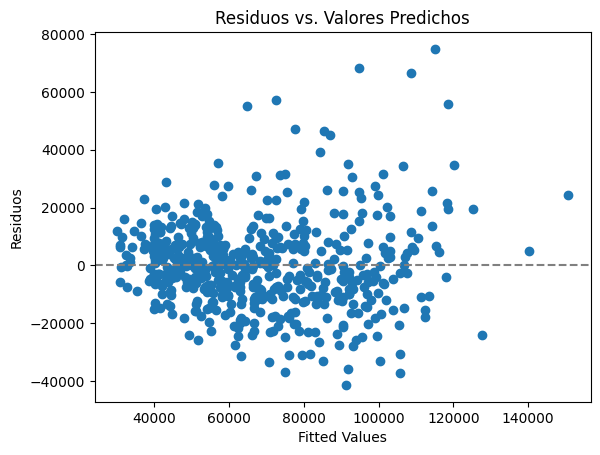

In [44]:
plt.scatter(regsums.fittedvalues, regsums.resid)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuos")
plt.title("Residuos vs. Valores Predichos")
plt.show()

In [45]:
# Test de heterocedasticidad de White. 
# H0 = homoscedasticidad
import statsmodels.stats.api as sms
white_test = sms.het_white(regsums.resid, regsums.model.exog)
print(f"LM p-value (el estadístico): {white_test[0]}     F p-value: {white_test[1]}")

LM p-value (el estadístico): 168.27932387737295     F p-value: 7.14472980045462e-10


### Banda de Confianza y de Prediccion

Intervalo de confianza para $\hat{Y}$ (Banda de confianza)

INtervalo de confianza para $Y$ (Banda de predicción)

**Banda de confianza**
$$
\hat y\ \pm\ t\, SE\big(\hat y\big)
$$

**Banda de predicción**
$$
\hat y\ \pm\ t\, SE\big(Y \big)
$$

**Relación**
$$
SE\big(Y \big)=\sqrt{SE\big(\hat y\big)^2+s^2},
\qquad
t=t_{1-\alpha/2,\;n-k},\quad s=\sqrt{\tfrac{SSE}{n-k}}
$$


In [46]:
predc = regsums.get_prediction()
IC_predc = predc.summary_frame(alpha = 0.05)
IC_predc.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,66037.975672,1790.507321,62520.673808,69555.277537,35536.935009,96539.016336
1,41391.151457,1406.499937,38628.199977,44154.102936,10967.871390,71814.431524
2,39889.630131,1534.101619,36876.015820,42903.244441,9442.562285,70336.697976
3,63689.087331,2262.055723,59245.468074,68132.706588,33067.398591,94310.776070
4,49760.426466,1567.689375,46680.831819,52840.021113,19306.757191,80214.095742


Bandas de confianza y prediccion para un valor especifico: la media de c/u

In [47]:
media_variables = pd.DataFrame(
    [[1] + dfcasa[regsums.model.exog_names[1:]].mean().tolist()],
    columns=regsums.model.exog_names
)
media_variables

,Intercept,LOTE,CUARTOS,BANOS,PISOS,ENTRADA,REC,SOTANO,CALEF,AIRE,GARAGE,NBHD
0,1,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.31685,0.692308,0.234432


In [48]:
pred_media = regsums.get_prediction(media_variables)
IC_media = pred_media.summary_frame(alpha=0.05)
IC_media

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,68121.59707,660.051427,66824.981251,69418.212888,37796.305946,98446.888193


Bandas para un valor específico

In [49]:
valores = pd.DataFrame([[1, 5000, 4, 2, 2, 1, 1, 1, 1, 1, 2, 0]], columns=regsums.model.exog_names)
pred = regsums.get_prediction(valores)
summary = pred.summary_frame(alpha=0.05)
print(summary)

            mean      mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  113411.589583  3852.264663  105844.137876  120979.041291  82183.262787   

   obs_ci_upper  
0  144639.91638  


###  Test de Heteroscedasticidad de White

In [64]:
white_test = sms.het_white(regsums.resid, regsums.model.exog)
print(f"LM p-value (el estadístico): {white_test[0]}     F p-value: {white_test[1]}")

LM p-value (el estadístico): 168.27932387737295     F p-value: 7.14472980045462e-10


In [ ]:
# Otro test de heteroestaticidad: Breusch-Pagan
import statsmodels.stats.api as sms
bp_test = sms.het_breuschpagan(regsums.resid, regsums.model.exog)
print(f"LM p-value (estadístico de Breusch-Pagan): {bp_test[1]}     F p-value: {bp_test[2]}")

LM p-value (estadístico de Breusch-Pagan): 4.013761948788031e-09     F p-value: 6.213267868698657


Corrección de la heterocedasticidad (corrige la segunda columna)

Resultados con errores estándar robustos (tipo White / HC1)

In [65]:
regsums_robusto = regsums.get_robustcov_results(cov_type='HC1')
print(regsums_robusto.summary())

                            OLS Regression Results                            
Dep. Variable:                 PRECIO   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     87.32
Date:                Wed, 20 Aug 2025   Prob (F-statistic):          1.05e-111
Time:                        21:03:48   Log-Likelihood:                -6034.1
No. Observations:                 546   AIC:                         1.209e+04
Df Residuals:                     534   BIC:                         1.214e+04
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4038.3504   3182.329     -1.269      0.2

## Ejemplo de Multicolinealidad

In [52]:
dfmulti = pd.read_excel('CEO_ejemplo_multicolinealidad.xlsx', sheet_name='Hoja1', usecols='A:C')
dfmulti.head(20)

,Gan,Gan_10,Comp
0,357.0,35,0.7
1,48.0,4,0.7
2,932.0,93,0.8
3,366.0,36,0.7
4,83.0,8,0.8
5,22.0,2,0.0
6,67.0,6,0.0
7,413.0,41,0.6
8,496.0,49,0.3
9,458.0,45,0.5


### p-values de betas Gan y Gan_10 grandes, indicando que no rechazamos $H_0: b=0$

In [53]:
X_mult = sm.add_constant(dfmulti.drop(columns='Comp'))
y = dfmulti["Comp"]
regre_multico = sm.OLS(y, X_mult).fit()
print(regre_multico.summary())

                            OLS Regression Results                            
Dep. Variable:                   Comp   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     25.92
Date:                Wed, 20 Aug 2025   Prob (F-statistic):           4.59e-09
Time:                        20:58:25   Log-Likelihood:                -73.546
No. Observations:                  70   AIC:                             153.1
Df Residuals:                      67   BIC:                             159.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6558      0.166      3.941      0.0

In [54]:
X = sm.add_constant(dfmulti["Gan"])
regre_normal = sm.OLS(y, X).fit()
print(regre_normal.summary())

                            OLS Regression Results                            
Dep. Variable:                   Comp   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     52.24
Date:                Wed, 20 Aug 2025   Prob (F-statistic):           5.50e-10
Time:                        20:58:25   Log-Likelihood:                -73.655
No. Observations:                  70   AIC:                             151.3
Df Residuals:                      68   BIC:                             155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6000      0.112      5.342      0.0